In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

plt.style.use('default')

In [291]:
# Source data was initially adjusted to remove unnecessary comments and rename column names
df = pd.read_csv('input/Dataset_spine.csv', sep=',')

# Remove, if any, empty values from the dataset
df = df.dropna()

# Map classification attribute from string to binary
df["Class_att"] = df["Class_att"].map({"Normal": 0, "Abnormal": 1})

In [292]:
# Separate data into training and validation
X = df.drop(["Class_att"], axis=1)
y = df["Class_att"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)

# Re-add class_att column for data handling
df_train = X_train.assign(Class_att=y_train)
df_test = X_test.assign(Class_att=y_test)

In [293]:
def structure_data(str):
    """
    [0]    = train data
    [0][0] = train data with normal result
    [0][1] = train data with abnormal result
    [1]    = test data
    [1][0] = test data with normal result
    [1][1] = test data with abnormal result
    """
    return [[df_train.loc[df_train["Class_att"] == 0, str].tolist(), 
             df_train.loc[df_train["Class_att"] == 1, str].tolist()],
            [df_test.loc[df_test["Class_att"] == 0, str].tolist(), 
             df_test.loc[df_test["Class_att"] == 1, str].tolist()]]

In [294]:
# Data handling for each attribute
pelvic_incidence = structure_data('pelvic_incidence')
pelvic_tilt = structure_data('pelvic_tilt')
lumbar_lordosis_angle = structure_data('lumbar_lordosis_angle')
sacral_slope = structure_data('sacral_slope')
pelvic_radius = structure_data('pelvic_radius')
degree_spondylolisthesis = structure_data('degree_spondylolisthesis')
pelvic_slope = structure_data('pelvic_slope')
direct_tilt = structure_data('direct_tilt')
thoracic_slope = structure_data('thoracic_slope')
cervical_tilt = structure_data('cervical_tilt')
sacrum_angle = structure_data('sacrum_angle')
scoliosis_slope = structure_data('scoliosis_slope')

In [295]:
def mlp_processing(layers, lrn_rate, slvr):
    # MLP training
    mlp = MLPClassifier(hidden_layer_sizes=layers, activation='logistic', learning_rate=lrn_rate, solver=slvr, max_iter=10000, tol=1e-4)
    mlp.fit(X_train, y_train)

    # Scores
    training_scores.append(mlp.score(X_train, y_train))
    test_scores.append(mlp.score(X_test, y_test))
    print("Training set score: {:.4f}".format(mlp.score(X_train, y_train)))
    print("Test set score: {:.4f}".format(mlp.score(X_test, y_test)))

    # Confusion matrix
    y_pred = mlp.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()

Training set score: 0.8922
Test set score: 0.7692


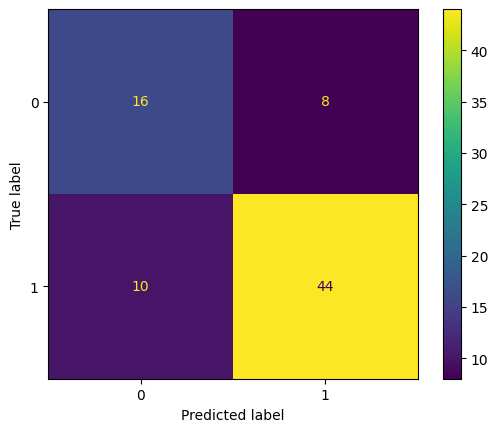

Training set score: 0.9526
Test set score: 0.7692


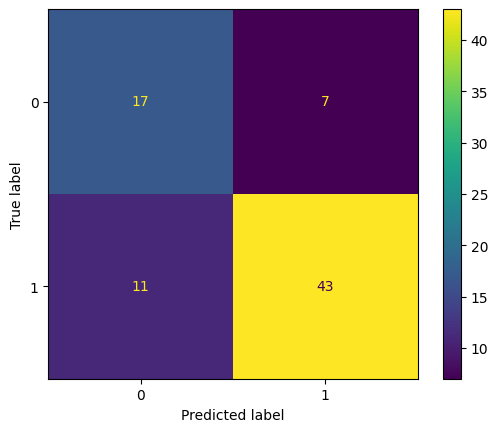

Training set score: 0.9741
Test set score: 0.7821


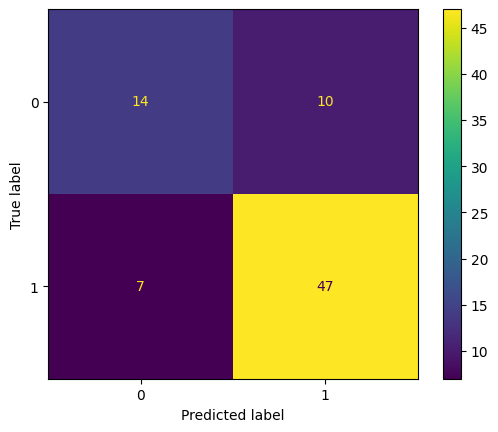

Training set score: 1.0000
Test set score: 0.7308


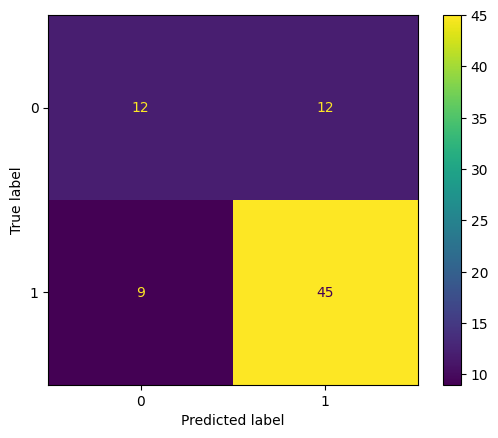

Training set score: 0.8836
Test set score: 0.8205


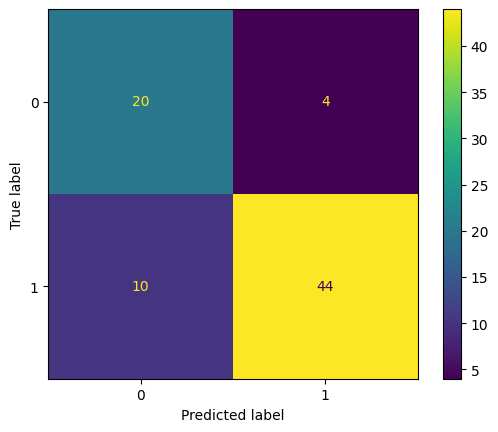

Training set score: 0.9871
Test set score: 0.8077


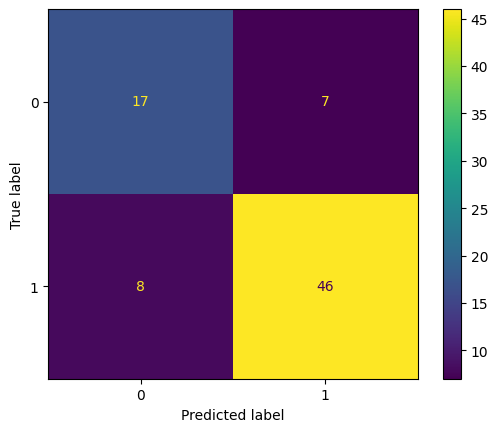

In [296]:
# Reset scores before every run
training_scores = list()
test_scores = list()

# Set of MLPs to train. Params: hidden_layer_sizes, learning_rate, solver
mlp_processing((10), 'constant', 'adam')
mlp_processing((10, 10, 10), 'constant', 'adam')
mlp_processing((100, 100, 100), 'constant', 'adam')
mlp_processing((100, 100, 100), 'constant', 'lbfgs')
mlp_processing((100, 100, 100), 'constant', 'adam')
mlp_processing((100, 100, 100, 100), 'constant', 'adam')

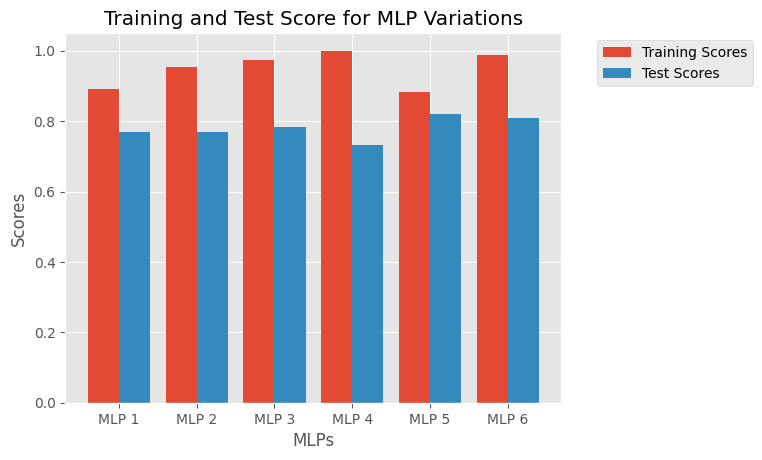

In [297]:
plt.style.use('ggplot')
X = ['MLP 1', 'MLP 2', 'MLP 3', 'MLP 4', 'MLP 5', 'MLP 6']

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, training_scores, 0.4, label="Training Scores")
plt.bar(X_axis + 0.2, test_scores, 0.4, label="Test Scores")

plt.xticks(X_axis, X)
plt.xlabel("MLPs")
plt.ylabel("Scores")
plt.title("Training and Test Score for MLP Variations")
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

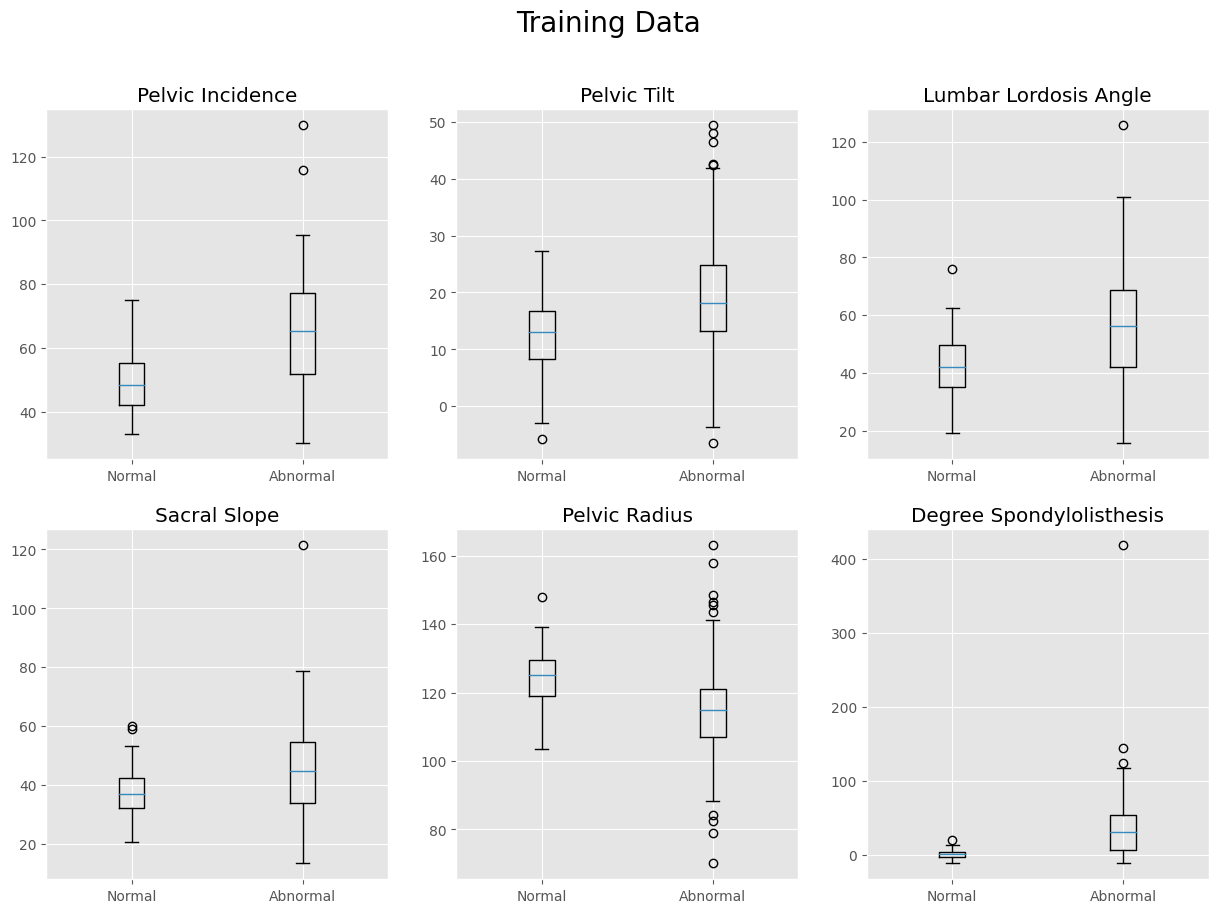

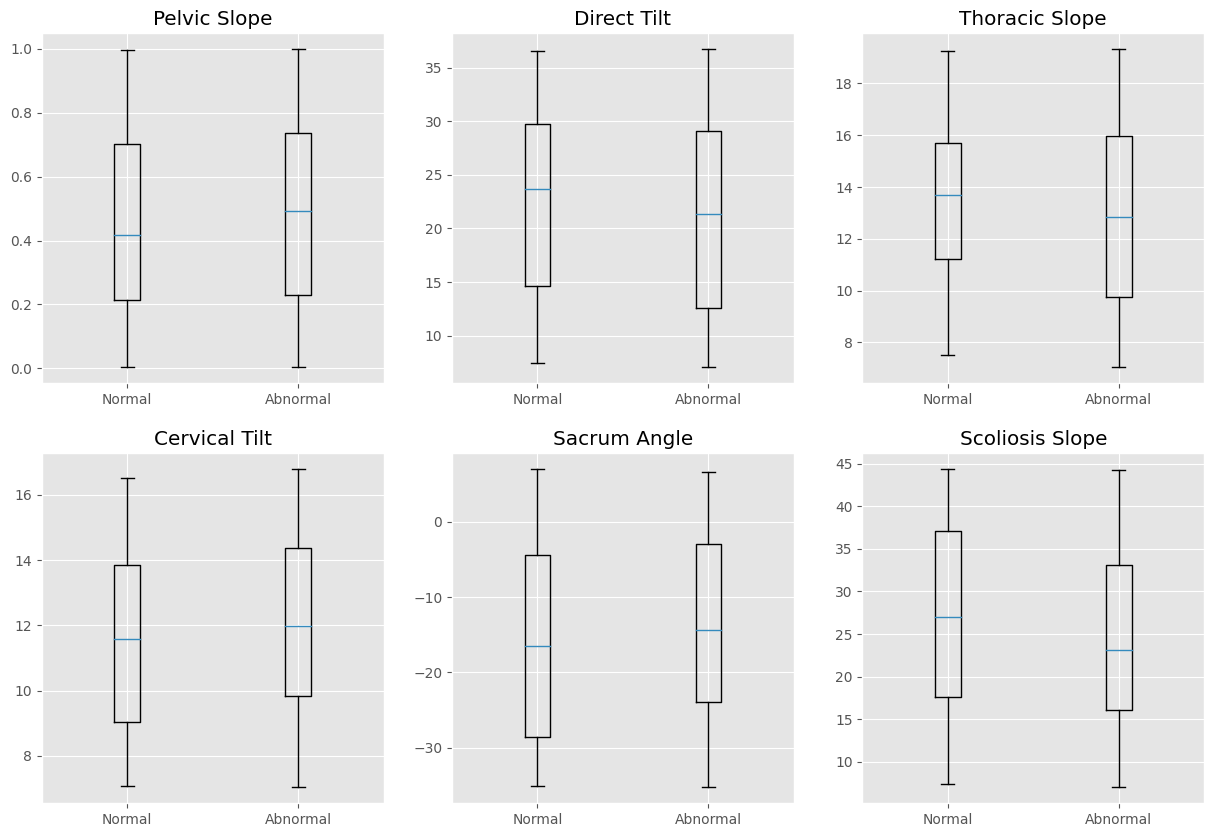

In [307]:
figure, axis = plt.subplots(2, 3, figsize=(15, 10))
figure.suptitle("Training Data", fontsize=20)

axis[0, 0].boxplot(pelvic_incidence[0], labels=['Normal', 'Abnormal'])
axis[0, 0].set_title("Pelvic Incidence")

axis[0, 1].boxplot(pelvic_tilt[0], labels=['Normal', 'Abnormal'])
axis[0, 1].set_title("Pelvic Tilt")

axis[0, 2].boxplot(lumbar_lordosis_angle[0], labels=['Normal', 'Abnormal'])
axis[0, 2].set_title("Lumbar Lordosis Angle")

axis[1, 0].boxplot(sacral_slope[0], labels=['Normal', 'Abnormal'])
axis[1, 0].set_title("Sacral Slope")

axis[1, 1].boxplot(pelvic_radius[0], labels=['Normal', 'Abnormal'])
axis[1, 1].set_title("Pelvic Radius")

axis[1, 2].boxplot(degree_spondylolisthesis[0], labels=['Normal', 'Abnormal'])
axis[1, 2].set_title("Degree Spondylolisthesis")

plt.show()

figure, axis = plt.subplots(2, 3, figsize=(15, 10))

axis[0, 0].boxplot(pelvic_slope[0], labels=['Normal', 'Abnormal'])
axis[0, 0].set_title("Pelvic Slope")

axis[0, 1].boxplot(direct_tilt[0], labels=['Normal', 'Abnormal'])
axis[0, 1].set_title("Direct Tilt")

axis[0, 2].boxplot(thoracic_slope[0], labels=['Normal', 'Abnormal'])
axis[0, 2].set_title("Thoracic Slope")

axis[1, 0].boxplot(cervical_tilt[0], labels=['Normal', 'Abnormal'])
axis[1, 0].set_title("Cervical Tilt")

axis[1, 1].boxplot(sacrum_angle[0], labels=['Normal', 'Abnormal'])
axis[1, 1].set_title("Sacrum Angle")

axis[1, 2].boxplot(scoliosis_slope[0], labels=['Normal', 'Abnormal'])
axis[1, 2].set_title("Scoliosis Slope")

plt.show()

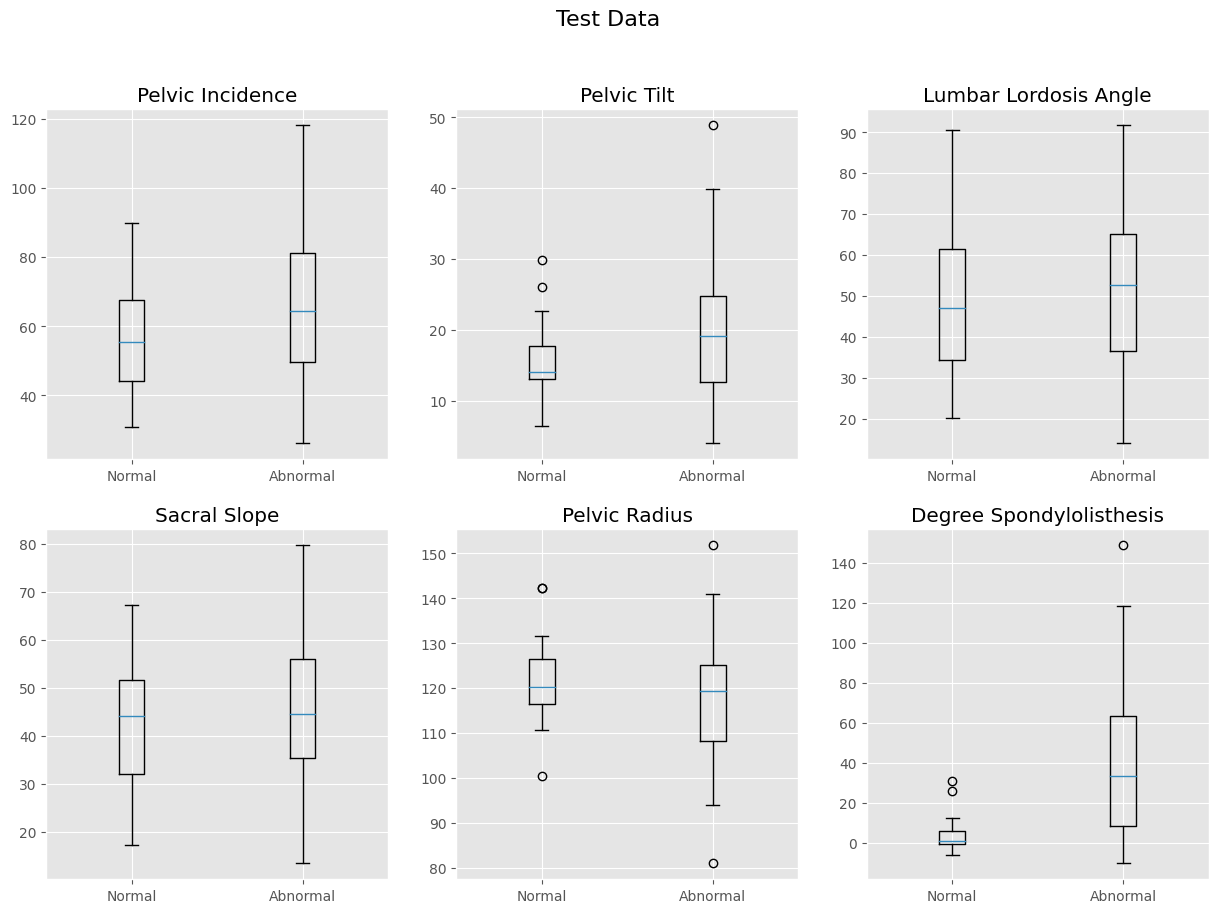

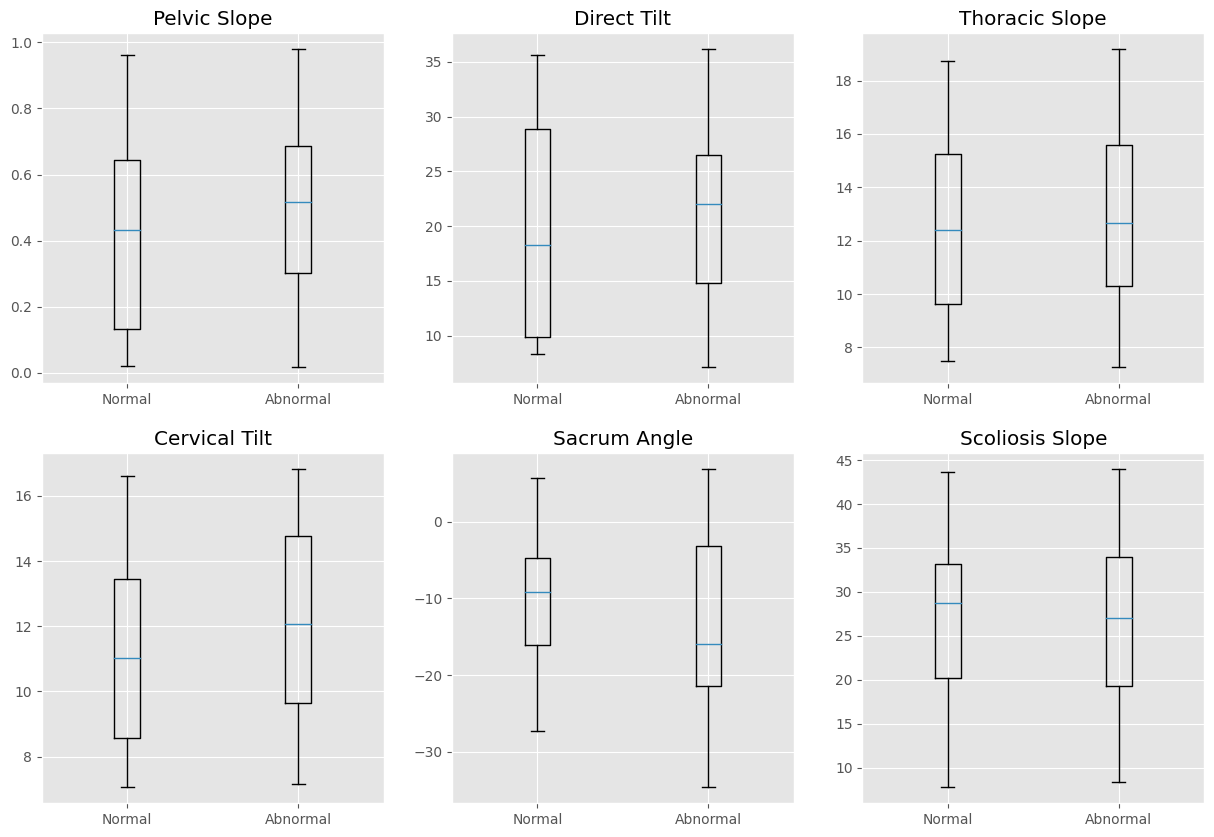

In [305]:
figure, axis = plt.subplots(2, 3, figsize=(15, 10))
figure.suptitle("Test Data", fontsize=20)

axis[0, 0].boxplot(pelvic_incidence[1], labels=['Normal', 'Abnormal'])
axis[0, 0].set_title("Pelvic Incidence")

axis[0, 1].boxplot(pelvic_tilt[1], labels=['Normal', 'Abnormal'])
axis[0, 1].set_title("Pelvic Tilt")

axis[0, 2].boxplot(lumbar_lordosis_angle[1], labels=['Normal', 'Abnormal'])
axis[0, 2].set_title("Lumbar Lordosis Angle")

axis[1, 0].boxplot(sacral_slope[1], labels=['Normal', 'Abnormal'])
axis[1, 0].set_title("Sacral Slope")

axis[1, 1].boxplot(pelvic_radius[1], labels=['Normal', 'Abnormal'])
axis[1, 1].set_title("Pelvic Radius")

axis[1, 2].boxplot(degree_spondylolisthesis[1], labels=['Normal', 'Abnormal'])
axis[1, 2].set_title("Degree Spondylolisthesis")

plt.show()

figure, axis = plt.subplots(2, 3, figsize=(15, 10))

axis[0, 0].boxplot(pelvic_slope[1], labels=['Normal', 'Abnormal'])
axis[0, 0].set_title("Pelvic Slope")

axis[0, 1].boxplot(direct_tilt[1], labels=['Normal', 'Abnormal'])
axis[0, 1].set_title("Direct Tilt")

axis[0, 2].boxplot(thoracic_slope[1], labels=['Normal', 'Abnormal'])
axis[0, 2].set_title("Thoracic Slope")

axis[1, 0].boxplot(cervical_tilt[1], labels=['Normal', 'Abnormal'])
axis[1, 0].set_title("Cervical Tilt")

axis[1, 1].boxplot(sacrum_angle[1], labels=['Normal', 'Abnormal'])
axis[1, 1].set_title("Sacrum Angle")

axis[1, 2].boxplot(scoliosis_slope[1], labels=['Normal', 'Abnormal'])
axis[1, 2].set_title("Scoliosis Slope")

plt.show()